In [1]:
import pandas as pd

In [2]:
file = './data/KBO_2019_player_gamestats.csv'
data = pd.read_csv(file, encoding = 'cp949')
data.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15311 non-null  object 
 1   이름      15311 non-null  object 
 2   생일      15311 non-null  object 
 3   일자      15311 non-null  object 
 4   상대      15311 non-null  object 
 5   결과      15311 non-null  object 
 6   타순      15311 non-null  int64  
 7   P       15311 non-null  object 
 8   선발      15311 non-null  int64  
 9   타수      15311 non-null  int64  
 10  득점      15311 non-null  int64  
 11  안타      15311 non-null  int64  
 12  2타      15311 non-null  int64  
 13  3타      15311 non-null  int64  
 14  홈런      15311 non-null  int64  
 15  루타      15311 non-null  int64  
 16  타점      15311 non-null  int64  
 17  도루      15311 non-null  int64  
 18  도실      15311 non-null  int64  
 19  볼넷      15311 non-null  int64  
 20  사구      15311 non-null  int64  
 21  고4      15311 non-null  int64  
 22

In [4]:
columns_select = ['팀','이름','생일','일자','상대','타수','안타','홈런','루타','타점','볼넷','사구','희비']
data = data[columns_select]
data.head()

,팀,이름,생일,일자,상대,타수,안타,홈런,루타,타점,볼넷,사구,희비
0,두산,페르난데스,1988-04-27,03-23,한화,4,2,0,3,3,0,0,0
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,1,2,0,0
3,두산,페르난데스,1988-04-27,03-27,키움,4,3,0,3,1,0,0,0
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,0,2,0,0


In [5]:
d_player = data.pivot_table( index = ['팀','이름','생일'],
                            values = ['타수','안타','홈런','루타','타점','볼넷','사구','희비'],
                            aggfunc = 'sum')
d_player

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  최윤석 1987-03-28    3   3   0    3   12   1   0   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    하주석 1994-02-25    7   0   0    5   19   2   0   0
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[285 rows x 8 columns]

<AxesSubplot:>

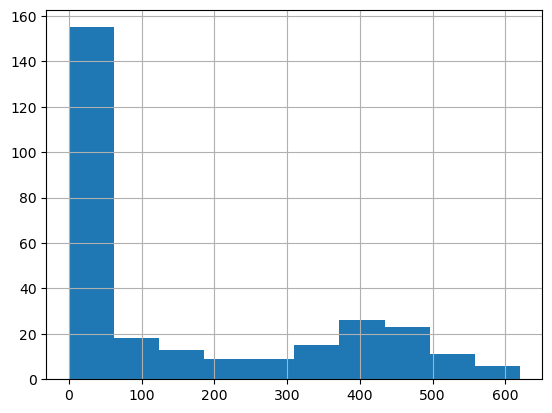

In [6]:
# 타수가 적은 선수 제외
#타수 데이터 분포
d_player['타수'].hist()

In [7]:
condition = d_player['타수'] > 50
d_player = d_player[condition].reset_index() #reset_index() : 기존 인덱스를 칼럼으로 바꾸고, 새로운 인덱스 생성
d_player.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2


In [8]:
# 타율 : 타격에 성공해서 진루하는 비율 = 안타/타수
# 출루율 : 살아서 진루하는 비율 = (안타+볼넷+몸데맞는볼)/(타수+볼넷+몸에맞는볼+희생플라이)
# 장타율 : 타율에 진루한 베이스 가중치 추가 = 루타/타수
# OPS : 출루율 + 장타율

def cal_hit(df):
    df['타율'] = df['안타']/df['타수']
    df['출루율'] = (df['안타']+df['볼넷']+df['사구'])/(df['타수']+df['볼넷']+df['사구']+df['희비'])
    df['장타율'] = df['루타']/df['타수']
    df['OPS'] = df['출루율'] + df['장타율']
    
    return df

In [9]:
player_stat = cal_hit(d_player)
player_stat.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.730287
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.713666
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.664995
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.632883
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.617833


In [11]:
p_stat = player_stat.sort_values(by = ['출루율','장타율','OPS','타율'], ascending = False).reset_index(drop=True) #drop=True : 원래인덱스를 칼럼으로 바꾸지않고 버리고 새로운인덱스 생성
p_stat.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,NC,나성범,1989-10-03,60,12,1,34,93,14,4,0,0.365591,0.443396,0.645161,1.088558
1,NC,양의지,1987-06-05,225,48,15,139,394,68,20,6,0.352792,0.436285,0.571066,1.007351
2,KT,강백호,1999-07-29,217,61,2,147,438,65,13,4,0.335616,0.415842,0.495434,0.911275
3,KIA,최형우,1983-12-16,221,85,7,137,456,86,17,7,0.300439,0.412613,0.484649,0.897262
4,두산,페르난데스,1988-04-27,277,63,6,197,581,90,15,6,0.339071,0.405488,0.476764,0.882252


<AxesSubplot:xlabel='팀', ylabel='출루율'>

/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46160 (\N{HANGUL SYLLABLE DU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minjeekim/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from cur

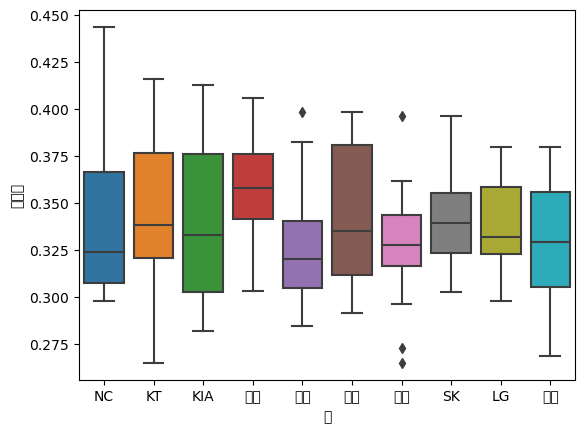

In [12]:
# 팀별 출루율 분포
import seaborn as sns

sns.boxplot(data=p_stat, x='팀',y='출루율')

In [13]:
# 위의 그래프는 한글이 들어있어 표시되지 않음. 아래 코드 이용하기

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

# 이미지 한글 표시 설정
if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font', family = 'AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 설정
matplotlib.rcParams['axes.unicode_minus'] = False

## 위의 그래프 다시 실행하면 한글 표시됨

<AxesSubplot:xlabel='팀', ylabel='출루율'>

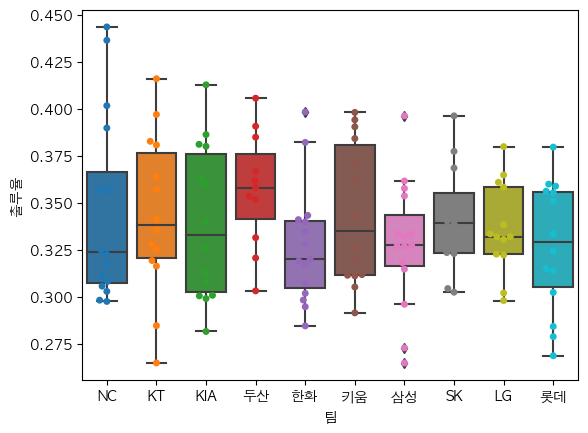

In [67]:
sns.boxplot(data=p_stat, x='팀',y='출루율')
sns.swarmplot(data=p_stat, x='팀',y='출루율')

<AxesSubplot:xlabel='팀', ylabel='출루율'>

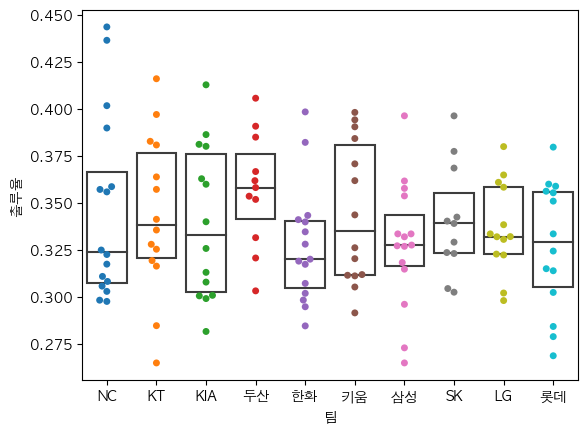

In [69]:
sns.boxplot(data=p_stat, x='팀',y='출루율',
            showcaps = False, # 박스 상하단 가로라인 보이지 않게
            whiskerprops = {'linewidth':0}, # 박스 상하단 세로라인 보이지 않게
            showfliers=False, #박스범위 벗어난 이상값 보이지 않게
            boxprops={'facecolor':'None'}) # 박스 색상 지우기 )
sns.swarmplot(data=p_stat, x='팀',y='출루율')
             

In [70]:
# 파일 저장
file = './data/player_stat.csv'
p_stat.to_csv(file, index = False) #MS-Office는 encoding = 'cp949'